In [2]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
data_path = "./data/"

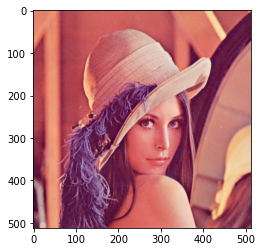

In [4]:
img = cv2.imread(data_path + "lena.jpg")
gray_img = cv2.imread(data_path + "lena.jpg", 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Image Filtering 

#### cv2.filter2D(img, ddepth, kernel)

In [5]:
k = np.ones((3,3), np.uint8)
k = k/(3*3)
k

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

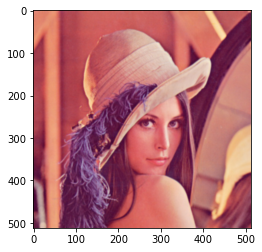

In [6]:
blur_dst = cv2.filter2D(img, -1, k)
plt.imshow(blur_dst)

In [51]:
# to do : make blur func
def blur_func(img, f_size):
    new_h, new_w = img.shape[:2]
    new_h -= (f_size//2)*2
    new_w -= (f_size//2)*2
    new_img = np.zeros((new_h,new_w,3), np.uint8)
    
    k = np.ones((f_size,f_size, 3), np.uint8)
    k = k/(f_size*f_size)
    
    for i in range(new_w):
        for j in range(new_h):
            new_value = img[i:i+f_size,j:j+f_size,:] * k
            new_value = new_value.sum(axis=0).sum(axis=0)
            new_img[i,j] = new_value.astype('uint8')
            
    plt.imshow(new_img)

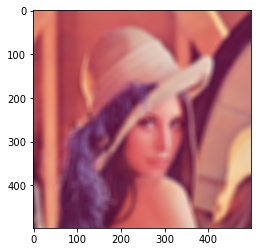

In [52]:
blur_func(img, 15)

#### motion blur

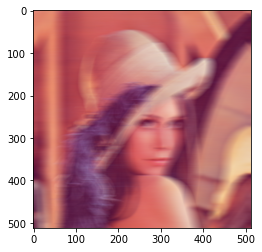

In [9]:
size=30
motion_blur = np.zeros((size, size))
motion_blur[int((size-1)/2), :] = np.ones(size)
motion_blur = motion_blur / size

dst = cv2.filter2D(img, -1, motion_blur)
plt.imshow(dst)

#### Sharpening

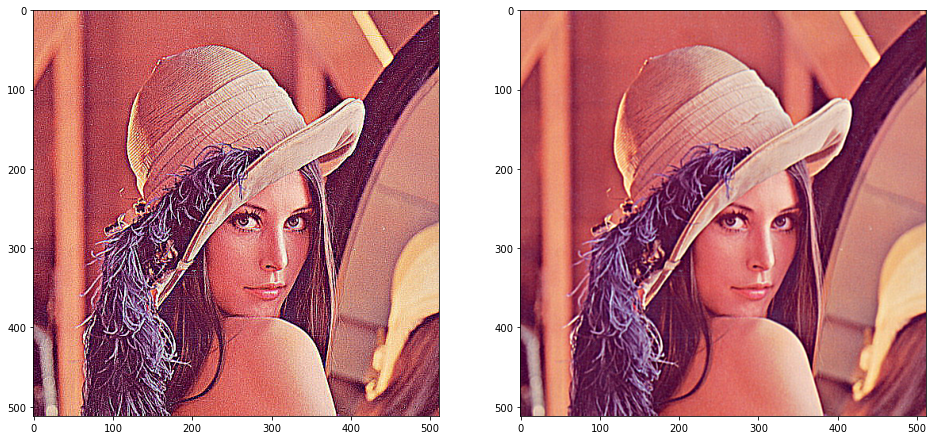

In [10]:
sharpening_1 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpening_2 = np.array([[-1, -1, -1, -1, -1],
                         [-1, 2, 2, 2, -1],
                         [-1, 2, 9, 2, -1],
                         [-1, 2, 2, 2, -1],
                         [-1, -1, -1, -1, -1]]) / 9.0

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize= (16,8))
dst1 = cv2.filter2D(img, -1, sharpening_1)
ax1.imshow(dst1)

dst2 = cv2.filter2D(img, -1, sharpening_2)
ax2.imshow(dst2)

In [11]:
# to do : sharpening

#### Embossing

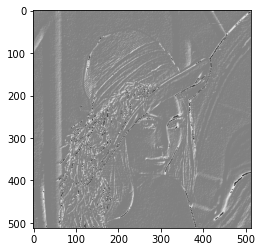

In [12]:
embossing = np.array([[1, 1, 0], [1, 0, -1], [0, -1, -1]])
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.filter2D(gray_image, -1, embossing) + 128
plt.imshow(dst, cmap='gray')

## < Blurring >

#### cv2.Blur(img, ksize)
#### cv2.GaussianBlur(img, ksize, sigma)
#### cv2.medianBlur(img, ksize)
#### cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)

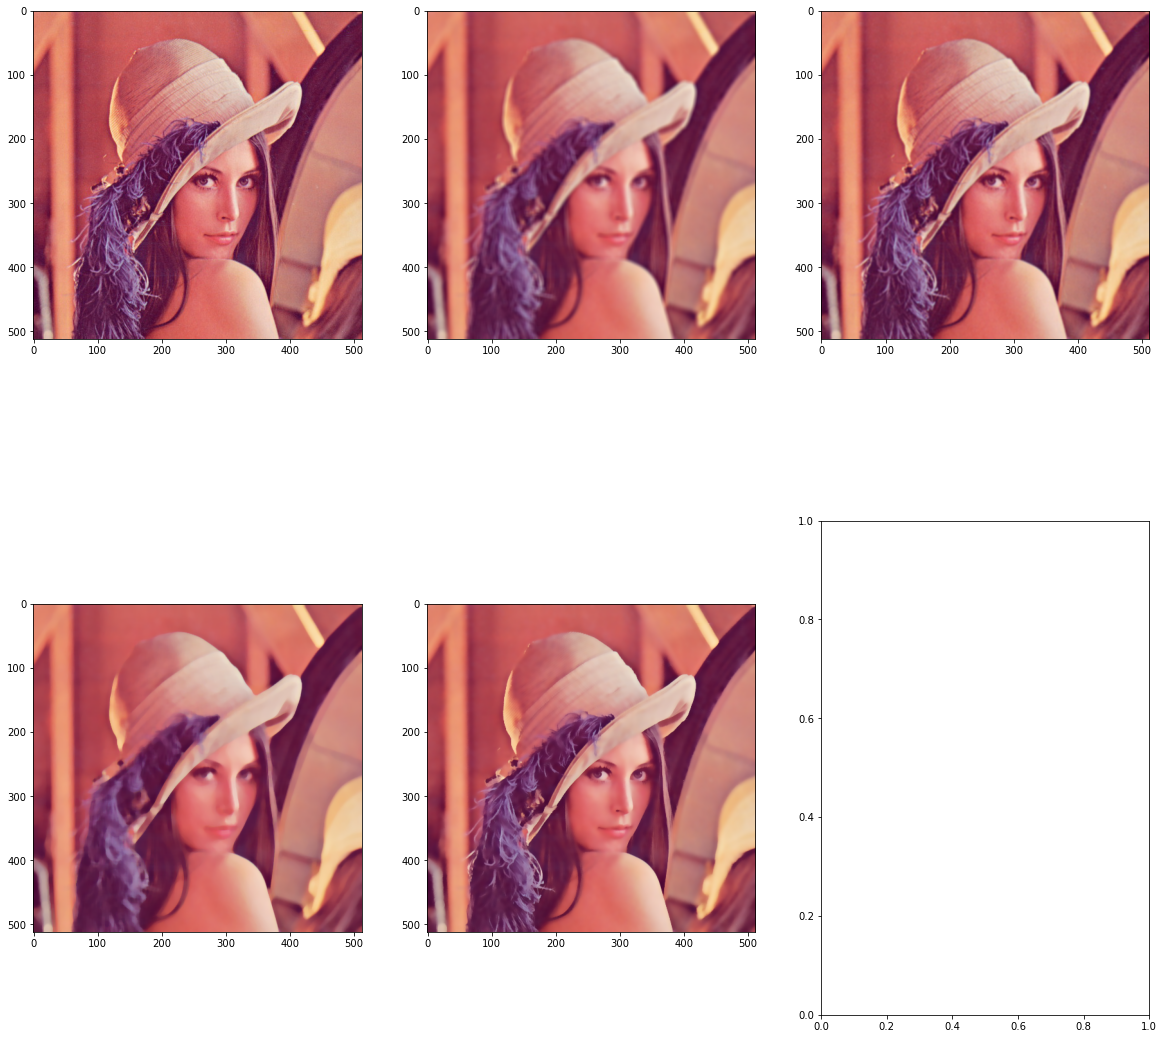

In [13]:
dst1 = cv2.blur(img,(7,7))
dst2 = cv2.GaussianBlur(img,(5,5),0)
dst3 = cv2.medianBlur(img,9)
dst4 = cv2.bilateralFilter(img,9,75,75)

images = [img,dst1,dst2,dst3,dst4]

fig, ((ax1, ax2, ax3), (ax4,ax5, _)) = plt.subplots(nrows=2, ncols=3, figsize =(20,20))
axs = [ax1, ax2, ax3, ax4, ax5]

for i in range(5):
    axs[i].imshow(images[i])

plt.show()